### Задание 1:

In [68]:
import numpy as np
import pylab as pl
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from PIL import Image


Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

In [62]:
#a оно же b оно же c
m = np.diag([-1,-1])
print(m.dot(m.transpose()))

[[-1  0]
 [ 0 -1]] 
или поставить комплексное число с модулем равным 1 
или любое число в 0 степени если подходит
[[1 0]
 [0 1]]


In [60]:
m=np.matrix('2,1;1,1')
det = np.linalg.det(m)
print(det)

1.0


In [16]:
#e
m = np.diag([1,1,1])
print(m)
det = np.linalg.det(m)
print(det)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
1.0


P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [94]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [95]:
a = np.array([[2, 2],
              [1, 3]])
w, v = np.linalg.eig(a)

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89 -0.71]
Собственное значение 4.0
соответствующий ему собственный вектор [0.45 -0.71]


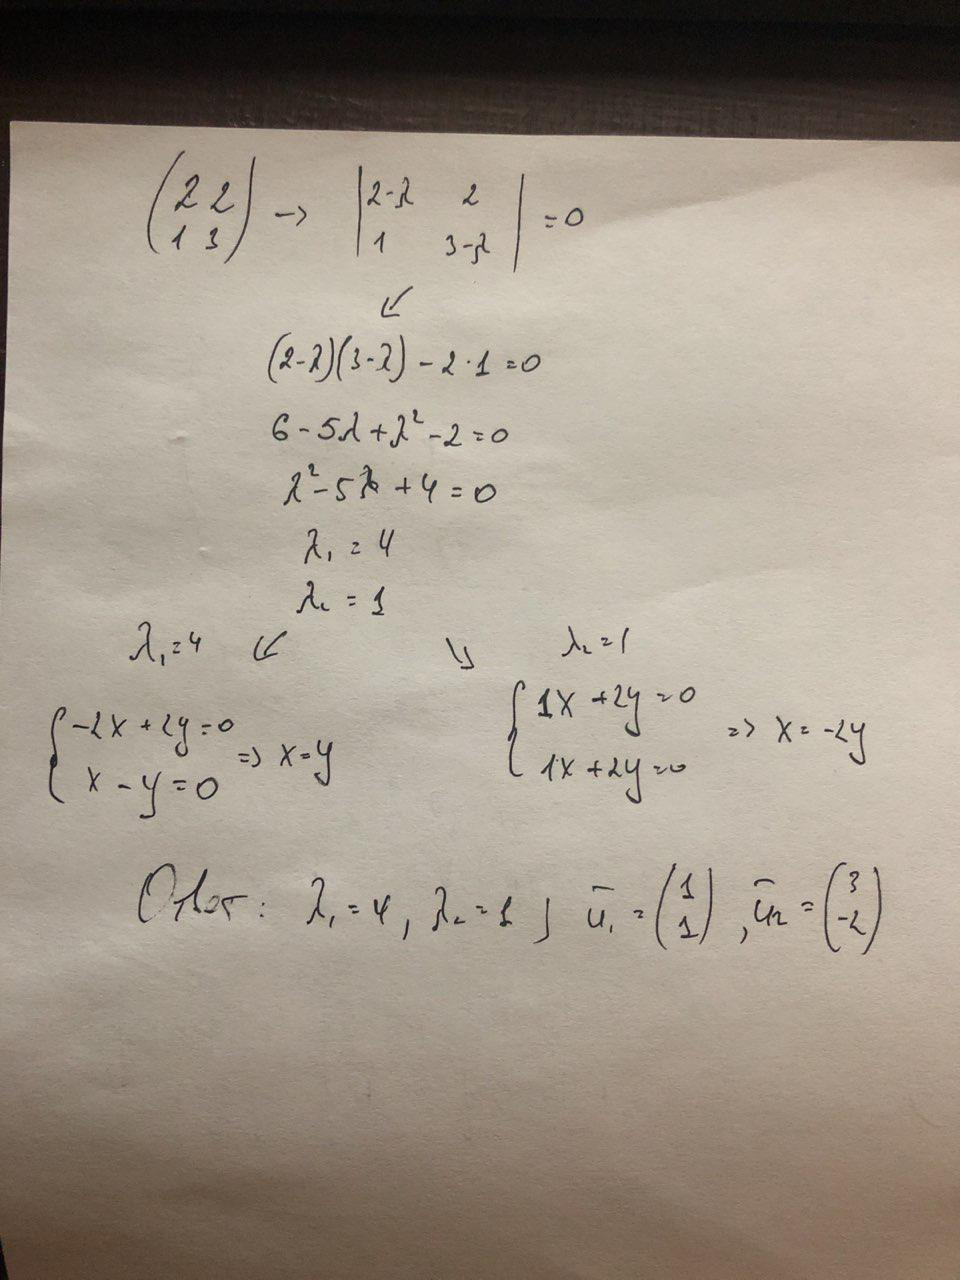

In [96]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))
img = Image.open("photo_1.jpg")
img

Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственное значение 2.999999999999999
соответствующий ему собственный вектор [-0.81649658  0.57735027 -0.27658128]
Собственное значение 5.999999999999997
соответствующий ему собственный вектор [0.40824829 0.57735027 0.8035929 ]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [-0.40824829 -0.57735027  0.52701162]


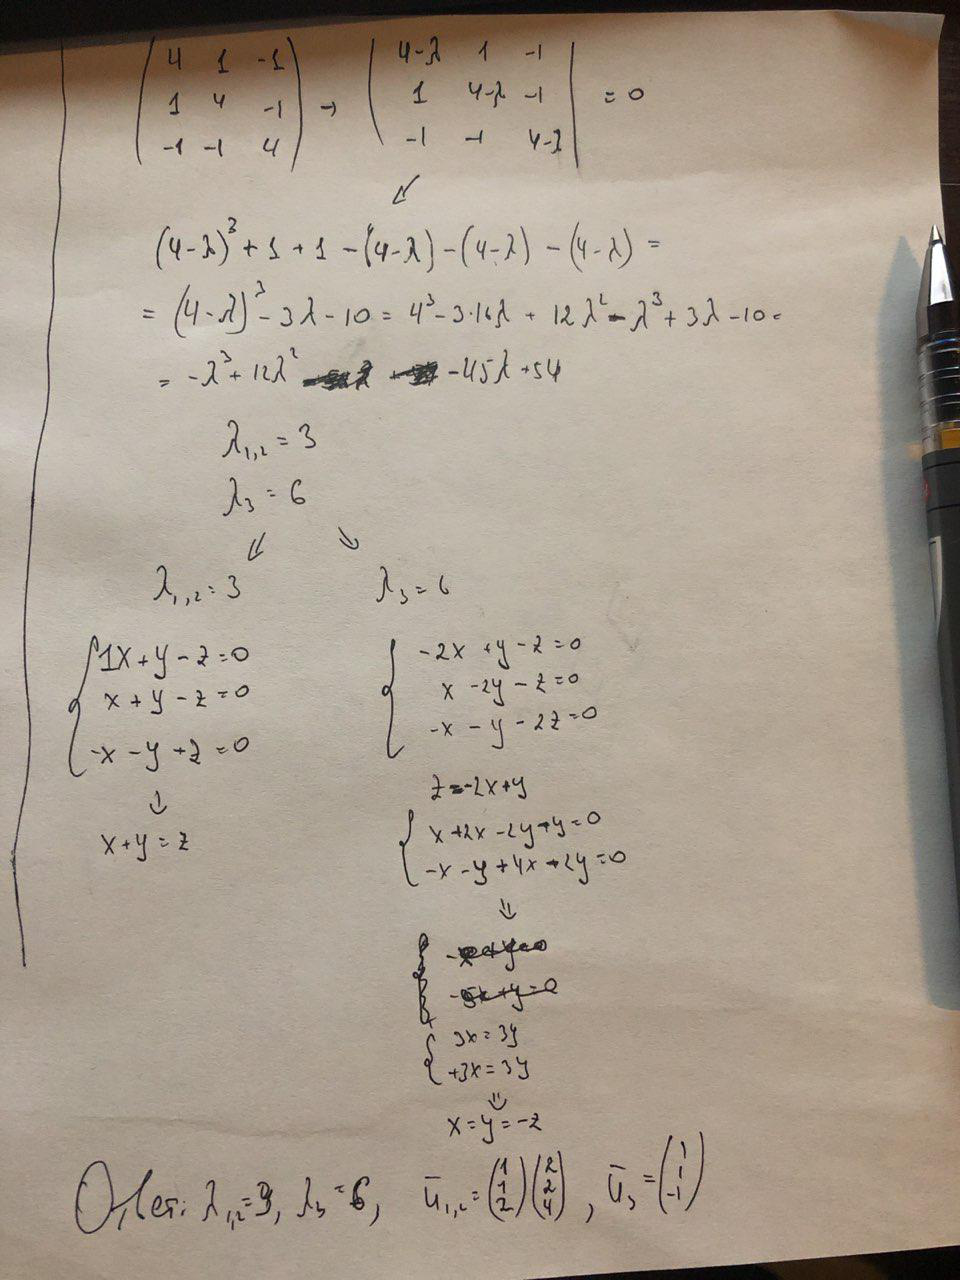

In [71]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))
img = Image.open("photo_2.jpg")
img

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

[[1 2]
 [2 3]]
Собственное значение -0.2360679774997898
соответствующий ему собственный вектор [-0.85 -0.53]
Собственное значение 4.23606797749979
соответствующий ему собственный вектор [0.53 -0.85]
После нахождения собственных значений, я не знаю, как быстро решить систему уравнений


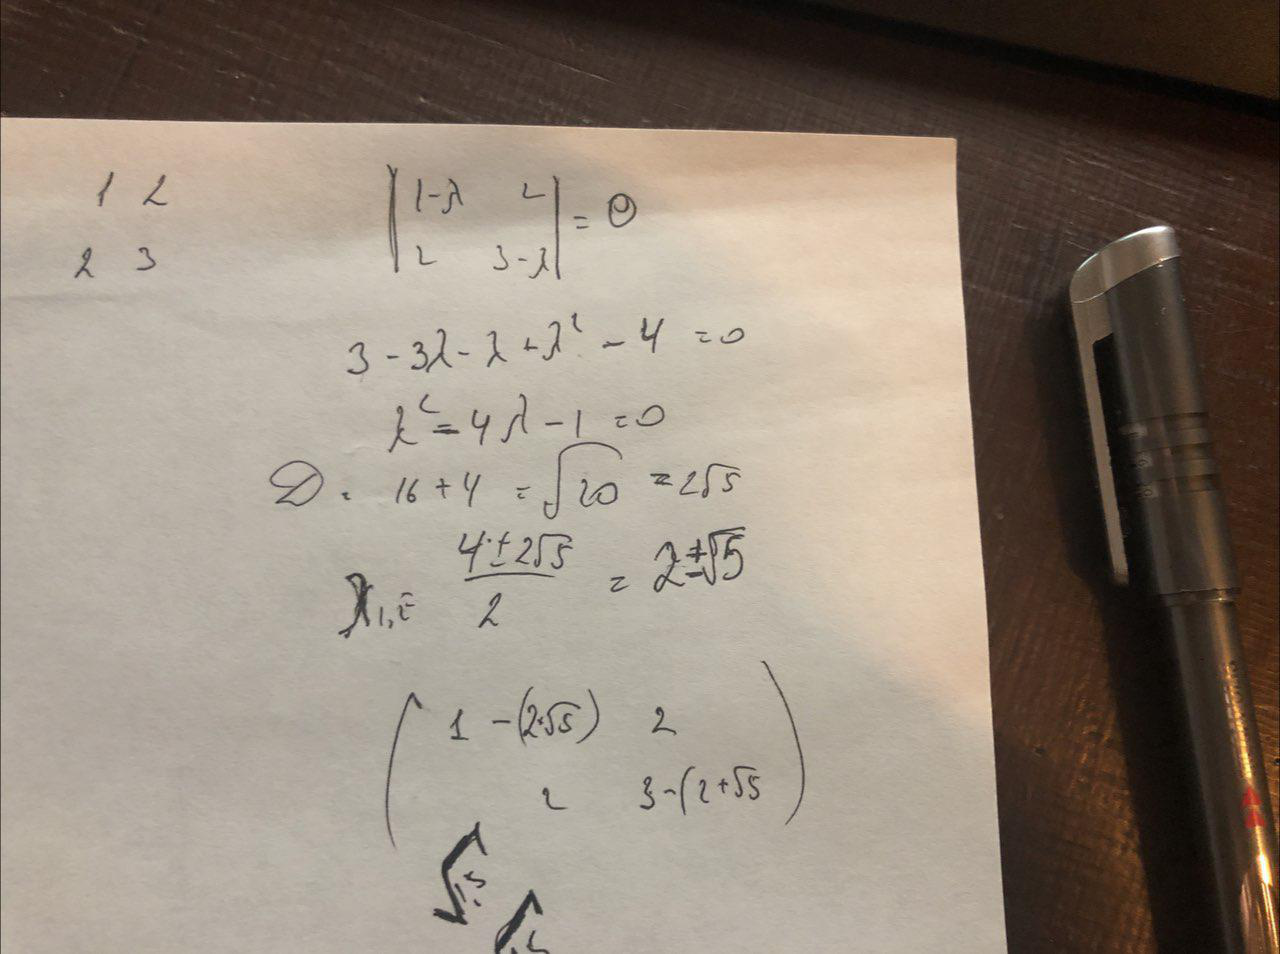

In [102]:
m = np.array([[1, 2],
              [2,3]])
print(m)
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))
print('После нахождения собственных значений, я не знаю, как быстро решить систему уравнений')    
img = Image.open("photo_3.jpg")
img

In [100]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798+0.j  4.23606798+0.j]

Eigenvectors:
[[-0.85 -0.53]
 [0.53 -0.85]]


In [101]:
print(U * np.diag(a) * U.T)

[[-0.17082039+0.j -0.        +0.j]
 [-0.        +0.j  3.06524758-0.j]]


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [75]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [76]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [77]:
X, y = load_digits(return_X_y=True)

In [78]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


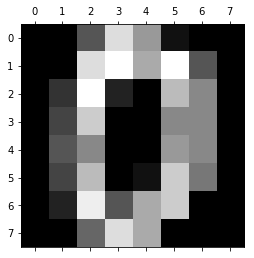

In [79]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [91]:
oob_score_int=[]
for i in range(1,64):
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
    svd.explained_variance_ratio_.sum()
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    rf_reduced.oob_score_
    oob_score_int.append(rf_reduced.oob_score_)
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    rf_reduced.oob_score_


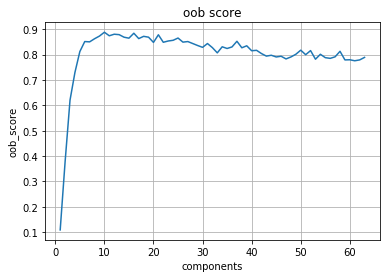

In [93]:
t = np.arange(1,64 , 1)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, oob_score_int)

ax.set(xlabel='components', ylabel='oob_score',
       title='oob score')
ax.grid()

fig.savefig("test.png")
plt.show()